In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset=pd.read_csv("Mall_Customers.csv")

In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [10]:
x = dataset.iloc[:, 3:5].values

In [5]:
from sklearn.cluster import AffinityPropagation
aff = AffinityPropagation(random_state=5)
y_aff=aff.fit_predict(x)


In [6]:
supervised = pd.DataFrame(dataset)

In [7]:
supervised['Cluster_group'] = y_aff

In [8]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,2
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,9
196,197,Female,45,126,28,10
197,198,Male,32,126,74,9
198,199,Male,32,137,18,10


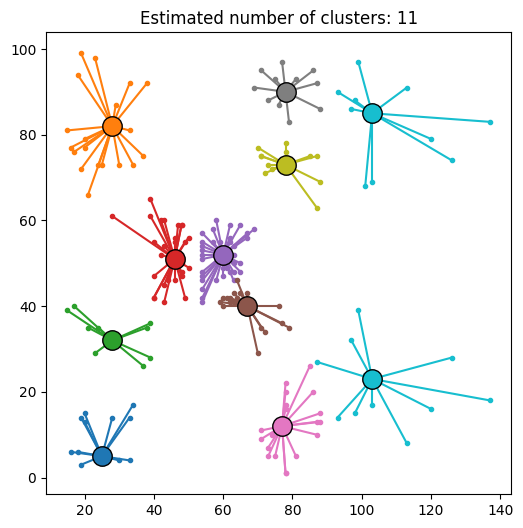

In [12]:
aff = AffinityPropagation(random_state=5)
y_aff = aff.fit_predict(x)

# Get cluster centers and labels
cluster_centers_indices = aff.cluster_centers_indices_
labels = aff.labels_

n_clusters = len(cluster_centers_indices)

# Plot
plt.figure(figsize=(6,6))
colors = plt.cm.tab10(np.linspace(0, 1, n_clusters))

for k, col in zip(range(n_clusters), colors):
    class_members = labels == k
    cluster_center = x[cluster_centers_indices[k]]
    plt.plot(x[class_members, 0], x[class_members, 1], '.', color=col)

    for point in x[class_members]:
        plt.plot([cluster_center[0], point[0]], 
                 [cluster_center[1], point[1]], color=col)

    plt.plot(cluster_center[0], cluster_center[1], 'o',
             markerfacecolor=col, markeredgecolor='k', markersize=14)

plt.title(f"Estimated number of clusters: {n_clusters}")
plt.show()